 **Importing the Dependencies**

In [1]:
import numpy as np              # to convert out data into a format suitable to feed our classification model
import pandas as pd             # to read our data from a CSV file and manipulate it for further use
import matplotlib.pyplot as plt # for visualizations
import seaborn as sns           # for visualizations
import math
from matplotlib import pyplot
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.model_selection import FeatureImportances
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectPercentile, f_classif

In [2]:
pd.__version__

'1.1.5'

In [3]:
np.__version__

'1.19.5'

In [4]:
sns.__version__

'0.11.2'

 **Data Collection and Analysis**

In [5]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv('/content/diabetes.csv')

In [6]:
type(diabetes_dataset)

pandas.core.frame.DataFrame

In [7]:
pd.read_csv?

In [8]:
# printing the first 5 rows of the dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


The following features have been provided to help us predict whether a person is diabetic or not:

*Pregnancies*: Number of times pregnant

*Glucose*: Plasma glucose concentration over 2 hours in an oral glucose tolerance test

*BloodPressure*: Diastolic blood pressure (mm Hg)

*SkinThickness*: Triceps skin fold thickness (mm)

*Insulin*: 2-Hour serum insulin (mu U/ml)
BMI: Body mass index (weight in kg/(height in m)2)

*DiabetesPedigreeFunction*: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)

*Age*: Age (years)

*Outcome*: Class variable (0 if non-diabetic, 1 if diabetic)

In [9]:
# number of rows and columns in this dataset
diabetes_dataset.shape

(768, 9)

In [10]:
# getting some informations about the dataset
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
# number of missing values in each column
diabetes_dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Data Analysis and Visulaization**

In [12]:
# getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


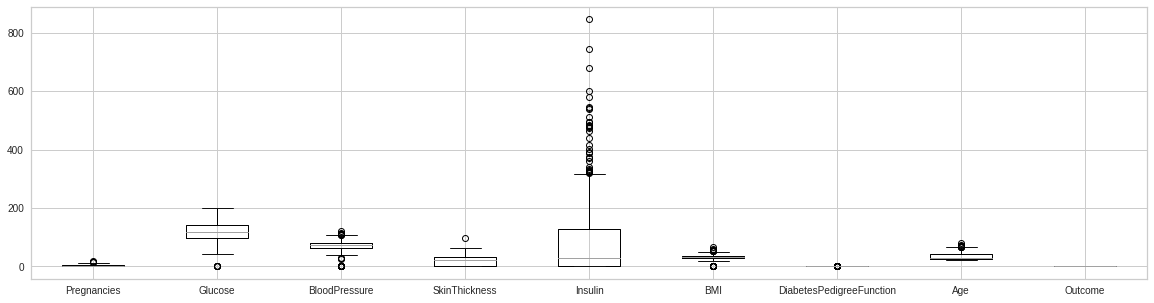

In [13]:
diabetes_dataset.boxplot(figsize=(20,5))

<function matplotlib.pyplot.show>

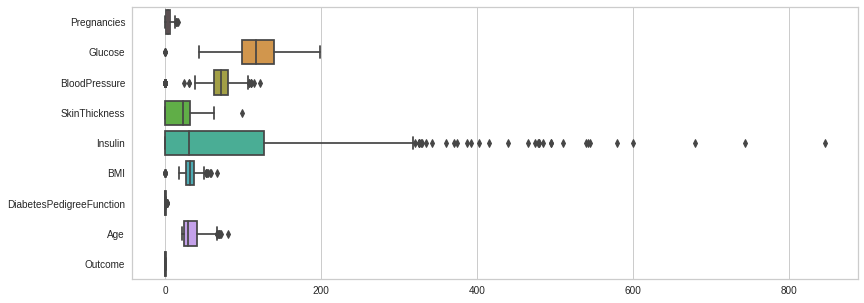

In [14]:
plt.figure(figsize=(13,5))
sns.boxplot(data=diabetes_dataset, orient='h')
plt.show

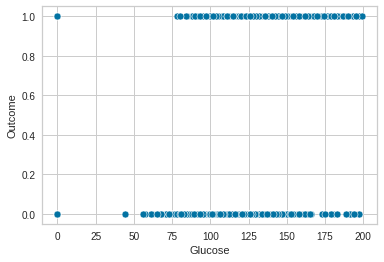

In [15]:
sns.scatterplot(x=diabetes_dataset['Glucose'],y=diabetes_dataset['Outcome'])
plt.show()

In [16]:
diabetes_dataset.replace()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [17]:
# separating the data and labels
X=diabetes_dataset.drop('Outcome',axis=1)

In [18]:
Y=diabetes_dataset['Outcome']

In [19]:
X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [20]:
X.replace(to_replace=0,value=X.mean(),inplace=True)

In [21]:
X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.400782,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885
std,2.984162,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,2.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000
50%,3.845052,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


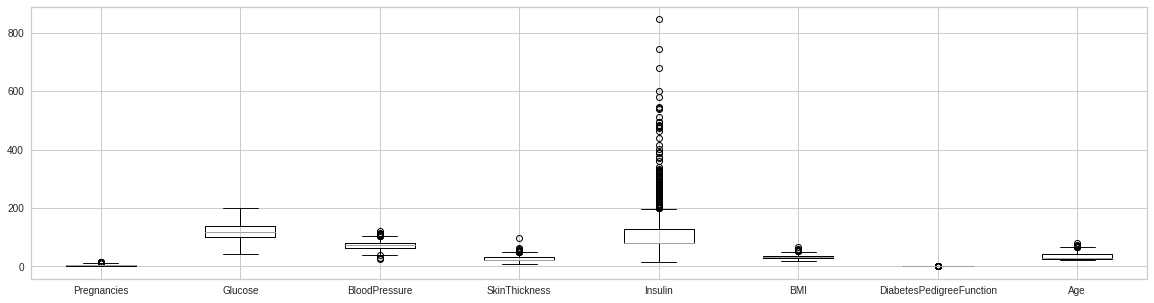

In [22]:
X.boxplot(figsize=(20,5))
plt.show()

In [23]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,3.845052,137.0,40.0,35.000000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10.000000,101.0,76.0,48.000000,180.000000,32.9,0.171,63
764,2.000000,122.0,70.0,27.000000,79.799479,36.8,0.340,27
765,5.000000,121.0,72.0,23.000000,112.000000,26.2,0.245,30
766,1.000000,126.0,60.0,20.536458,79.799479,30.1,0.349,47


In [24]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [25]:
feature_names = ["Pregnancies", "Glucose", "BloodPressure",	"SkinThickness","Insulin","BMI","DiabetesPedigreeFunction",	"Age"]
diabetes_dataset = pd.DataFrame(X,columns = feature_names)
diabetes_dataset['Outcome'] = Y

<Figure size 432x432 with 0 Axes>

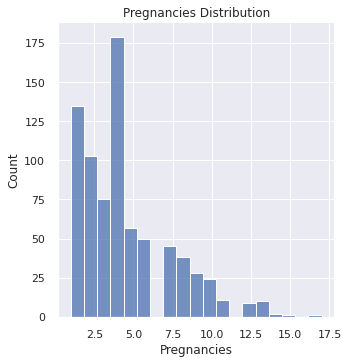

In [26]:
# distribution of Pregnancies value 
sns.set()
plt.figure(figsize=(6,6))
sns.displot(diabetes_dataset['Pregnancies'])
plt.title('Pregnancies Distribution')
plt.show()

<Figure size 432x432 with 0 Axes>

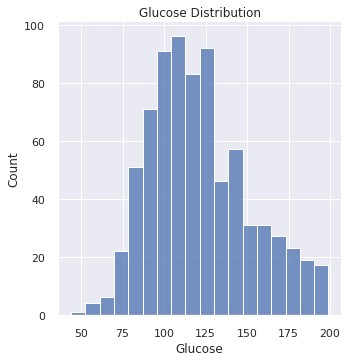

In [27]:
# Glucose for diabetic
plt.figure(figsize=(6,6))
sns.displot(diabetes_dataset['Glucose'])
plt.title('Glucose Distribution')
plt.show()

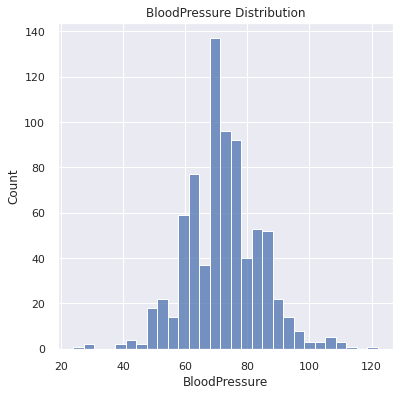

In [28]:
# BloodPressure for diabetic
plt.figure(figsize=(6,6))
sns.histplot(diabetes_dataset['BloodPressure'])
plt.title('BloodPressure Distribution')
plt.show()

<Figure size 432x432 with 0 Axes>

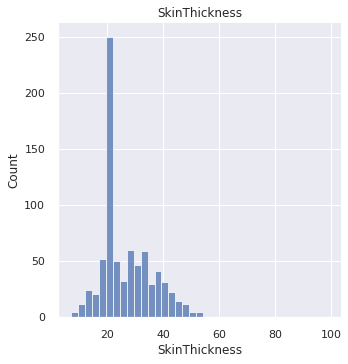

In [29]:
# SkinThickness for diabetic
plt.figure(figsize=(6,6))
sns.displot(diabetes_dataset['SkinThickness'])
plt.title('SkinThickness')
plt.show()

<Figure size 432x432 with 0 Axes>

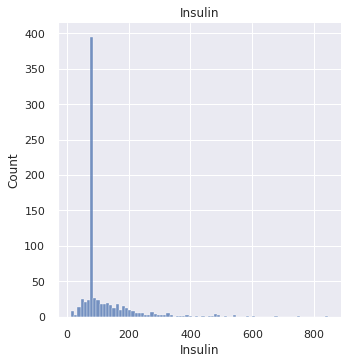

In [30]:
# Insulin for diabetic
plt.figure(figsize=(6,6))
sns.displot(diabetes_dataset['Insulin'])
plt.title('Insulin')
plt.show()

<Figure size 432x432 with 0 Axes>

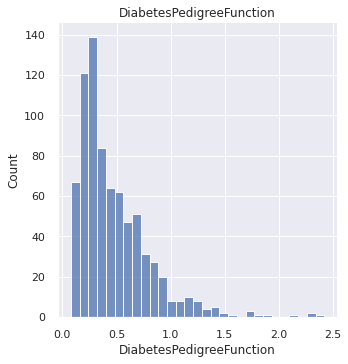

In [31]:
# DiabetesPedigreeFunction for diabetic
plt.figure(figsize=(6,6))
sns.displot(diabetes_dataset['DiabetesPedigreeFunction'])
plt.title('DiabetesPedigreeFunction')
plt.show()

<Figure size 432x432 with 0 Axes>

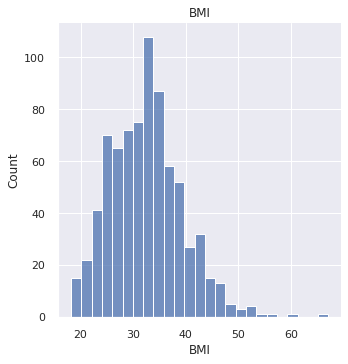

In [32]:
# BMI for diabetic
plt.figure(figsize=(6,6))
sns.displot(diabetes_dataset['BMI'])
plt.title('BMI')
plt.show()

<Figure size 432x432 with 0 Axes>

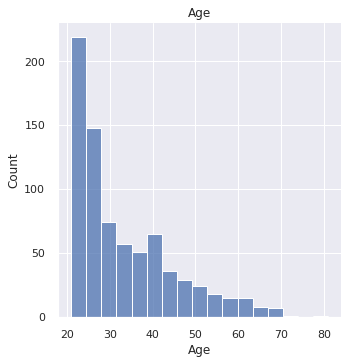

In [33]:
# Age for diabetic
plt.figure(figsize=(6,6))
sns.displot(diabetes_dataset['Age'])
plt.title('Age')
plt.show()

*Understanding the correlation between various features in the dataset*

*1.Positive Correlation*

*2.Negative Correlation* 

In [34]:
correlation = diabetes_dataset.corr()

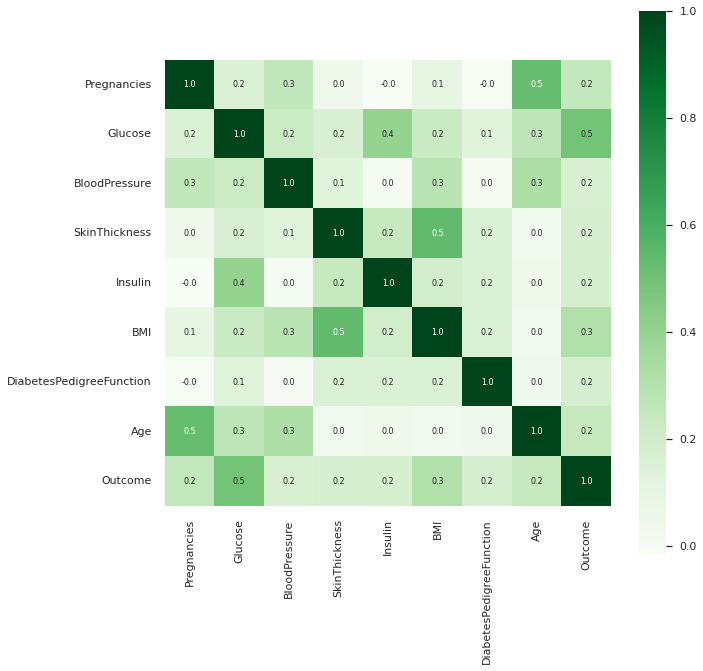

In [35]:
# constructing a heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Greens')

Here in the above heatmap, brighter colors indicate more correlation.

As we can see from the table and the heatmap, **glucose levels, age, BMI and number of pregnancies** all have signicant correlation with the outcome variable.

Also notice the correlation between pairs of features, like age and pregnancies, or insulin and skin thickness.

In [36]:
diabetes_dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

*0 -->Non-Diabetes*

*1 -->Diabetes*

In [37]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.859378,110.705367,70.810008,25.373135,106.457354,30.880066,0.429734,31.190000
1,5.410866,142.159661,74.950326,28.907494,141.426597,35.381288,0.550500,37.067164


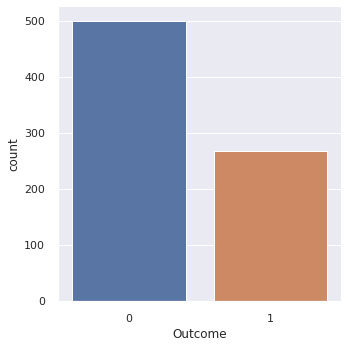

In [38]:
# number of values for each outcome
sns.catplot(x='Outcome', data = diabetes_dataset, kind = 'count')

The above plot shows how many people in the dataset are diabetic and how many are not. 

 **Data Standardisation**

In [39]:
scaler = StandardScaler()

In [40]:
scaler.fit(X)

StandardScaler()

In [41]:
standardized_data = scaler.transform(X)  

In [42]:
print(standardized_data)

[[ 0.5362511   0.86527574 -0.0210444  ...  0.16725546  0.46849198
   1.4259954 ]
 [-1.1403533  -1.20598931 -0.51658286 ... -0.85153454 -0.36506078
  -0.19067191]
 [ 1.20689286  2.01597855 -0.68176235 ... -1.33182125  0.60439732
  -0.10558415]
 ...
 [ 0.20093022 -0.02240928 -0.0210444  ... -0.90975111 -0.68519336
  -0.27575966]
 [-1.1403533   0.14197684 -1.01212132 ... -0.34213954 -0.37110101
   1.17073215]
 [-1.1403533  -0.94297153 -0.18622389 ... -0.29847711 -0.47378505
  -0.87137393]]


In [43]:
X = standardized_data
Y = diabetes_dataset['Outcome']

In [44]:
print(X)
print(Y)

[[ 0.5362511   0.86527574 -0.0210444  ...  0.16725546  0.46849198
   1.4259954 ]
 [-1.1403533  -1.20598931 -0.51658286 ... -0.85153454 -0.36506078
  -0.19067191]
 [ 1.20689286  2.01597855 -0.68176235 ... -1.33182125  0.60439732
  -0.10558415]
 ...
 [ 0.20093022 -0.02240928 -0.0210444  ... -0.90975111 -0.68519336
  -0.27575966]
 [-1.1403533   0.14197684 -1.01212132 ... -0.34213954 -0.37110101
   1.17073215]
 [-1.1403533  -0.94297153 -0.18622389 ... -0.29847711 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [45]:
# feature names as a list
col= diabetes_dataset.columns
print(col)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [46]:
y = diabetes_dataset.Outcome
list = ['Outcome']
x = diabetes_dataset.drop(list, axis = 1)
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,3.845052,137.0,40.0,35.000000,168.000000,43.1,2.288,33


**Train Test Split**

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [48]:
X_test

array([[-0.46971154, -0.51556763, -0.0210444 , ..., -0.96796768,
        -0.79995787, -0.53102292],
       [-0.46971154, -0.28542707, -2.33355721, ..., -1.46280853,
        -1.00230582, -0.95646168],
       [ 0.20093022,  0.83239852,  0.47449405, ...,  0.1818096 ,
        -0.76673656,  2.7023117 ],
       ...,
       [-0.80503242, -0.38405874,  0.14413508, ..., -0.00739425,
         0.6829204 , -0.53102292],
       [-0.80503242, -1.33749821, -0.0210444 , ..., -0.34213954,
         0.22688248, -0.70119842],
       [ 2.88349725, -0.51556763, -0.0210444 , ...,  0.60387974,
        -0.88754131,  1.00055664]])

In [49]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


**Model Training --> (1) KNN Classifier in Sklearn**

In [50]:
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)

In [51]:
classifier.fit(X_train, Y_train)

KNeighborsClassifier()

Feature: 0, Score: 0.04951
Feature: 1, Score: 0.13518
Feature: 2, Score: 0.03550
Feature: 3, Score: 0.03974
Feature: 4, Score: 0.02964
Feature: 5, Score: 0.05016
Feature: 6, Score: 0.05147
Feature: 7, Score: 0.04397


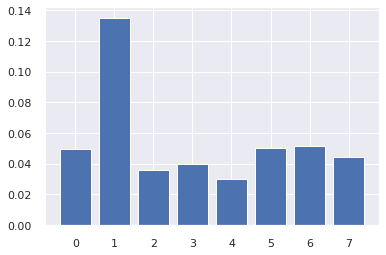

In [52]:
from sklearn.inspection import permutation_importance
# perform permutation importance
results = permutation_importance(classifier, X_train, Y_train, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [53]:
Y_pred = classifier.predict(X_test)

In [54]:
cm = confusion_matrix(Y_test, Y_pred)

In [55]:
print(cm)

[[86 14]
 [29 25]]


***Model Evaluation***

In [56]:
print("Correct:",sum(Y_pred == Y_test))

Correct: 111


In [57]:
print("Incorrect:",sum(Y_pred != Y_test))

Incorrect: 43


In [58]:
print("Accuracy:",sum(Y_pred == Y_test)/len(Y_pred))

Accuracy: 0.7207792207792207


**Model Training --> (2) Support Vector Machine**

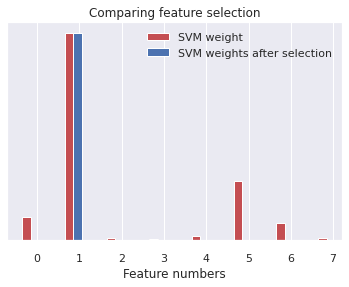

In [59]:
X_indices = np.arange(X.shape[-1])
selector = SelectPercentile(f_classif, percentile=10)
selector.fit(X_train, Y_train)

# Compare to the weights of an SVM
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, Y_train)

svm_weights = (classifier.coef_ ** 2).sum(axis=0)
svm_weights /= svm_weights.max()

plt.bar(X_indices - .25, svm_weights, width=.2, label='SVM weight', color='r')

classifier_selected = svm.SVC(kernel='linear')
classifier_selected.fit(selector.transform(X_train), Y_train)

svm_weights_selected = (classifier_selected.coef_ ** 2).sum(axis=0)
svm_weights_selected /= svm_weights_selected.max()

plt.bar(X_indices[selector.get_support()] - .05, svm_weights_selected,
        width=.2, label='SVM weights after selection', color='b')


plt.title("Comparing feature selection")
plt.xlabel('Feature numbers')
plt.yticks(())
plt.axis('tight')
plt.legend(loc='upper right')
plt.show()

In [60]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

*Model Evaluation*

In [61]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [62]:
print('Accuracy score of the training data :', training_data_accuracy)

Accuracy score of the training data : 0.7817589576547231


In [63]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [64]:
print('Accuracy score of the test data :', test_data_accuracy)

Accuracy score of the test data : 0.7727272727272727


**Model training -->(3) Logistic Regression**

In [65]:
model = LogisticRegression()

In [66]:
#training the Logistic Regression model with training data
model.fit(X_train, Y_train)

LogisticRegression()

In [67]:
Y_pred=model.predict(X_test)

In [68]:
Y_pred

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1])

In [69]:
Y_test

615    0
80     0
148    0
132    1
501    0
      ..
127    0
185    1
85     0
497    0
86     0
Name: Outcome, Length: 154, dtype: int64

In [70]:
accuracy_score(Y_test,Y_pred)

0.7597402597402597

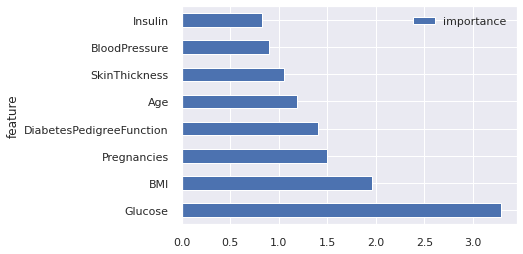

In [71]:
w = model.coef_[0]
feature_importance = pd.DataFrame(feature_names, columns = ["feature"])
feature_importance["importance"] = pow(math.e, w)
feature_importance = feature_importance.sort_values(by = ["importance"], ascending=False)
 

ax = feature_importance.plot.barh(x='feature', y='importance')
plt.show()

**Model Training --> (4) Decision Tree**

In [72]:
model = DecisionTreeClassifier()

In [73]:
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [74]:
Y_pred = model.predict(X_test)

In [75]:
Y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0])

In [76]:
Y_test

615    0
80     0
148    0
132    1
501    0
      ..
127    0
185    1
85     0
497    0
86     0
Name: Outcome, Length: 154, dtype: int64

In [77]:
accuracy_score(Y_test,Y_pred)

0.6883116883116883

In [78]:
model.feature_importances_


array([0.0493087 , 0.34407762, 0.10120191, 0.05092742, 0.07600596,
       0.19322667, 0.06808697, 0.11716475])

In [79]:
diabetes_dataset = pd.DataFrame({'Feature_names' :x.columns,'Importances' : model.feature_importances_})
diabetes_dataset

,Feature_names,Importances
0,Pregnancies,0.049309
1,Glucose,0.344078
2,BloodPressure,0.101202
3,SkinThickness,0.050927
4,Insulin,0.076006
5,BMI,0.193227
6,DiabetesPedigreeFunction,0.068087
7,Age,0.117165


In [80]:
diabetes_dataset_1 = diabetes_dataset.sort_values(by='Importances',ascending=False)
diabetes_dataset_1

,Feature_names,Importances
1,Glucose,0.344078
5,BMI,0.193227
7,Age,0.117165
2,BloodPressure,0.101202
4,Insulin,0.076006
6,DiabetesPedigreeFunction,0.068087
3,SkinThickness,0.050927
0,Pregnancies,0.049309


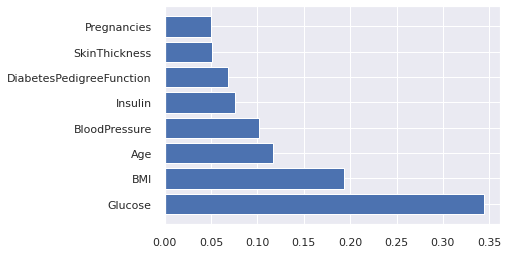

In [81]:
ax = plt.barh(diabetes_dataset_1['Feature_names'], diabetes_dataset_1['Importances'])
plt.show()




**Model Training --> (5) Random Forest Classifier**

In [82]:
model = RandomForestClassifier()

In [83]:
model.fit(X_train, Y_train)

RandomForestClassifier()

In [84]:
feature_imp = pd.Series(model.feature_importances_,index=feature_names).sort_values(ascending=False)
feature_imp

Glucose                     0.273263
BMI                         0.152751
Age                         0.125101
DiabetesPedigreeFunction    0.123073
Pregnancies                 0.089311
BloodPressure               0.085837
Insulin                     0.078021
SkinThickness               0.072643
dtype: float64

No handles with labels found to put in legend.


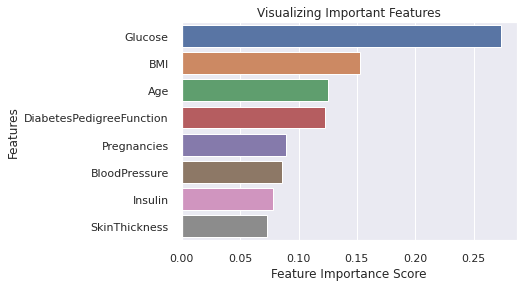

In [85]:
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

*Model Evaluation*

In [86]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [87]:
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.7532467532467533


**Model Training --> (6) Naive Bayes**

In [88]:
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

GaussianNB()

In [89]:
Y_pred = classifier.predict(X_test)

In [90]:
cm = confusion_matrix(Y_pred, Y_test)

In [91]:
print(cm)

[[86 28]
 [14 26]]


*Model Evaluation*

In [92]:
print("Correct:",sum(Y_pred == Y_test))

Correct: 112


In [93]:
print("Incorrect:",sum(Y_pred != Y_test))

Incorrect: 42


In [94]:
print("Accuracy:",sum(Y_pred == Y_test)/len(Y_pred))

Accuracy: 0.7272727272727273


The naive bayes classifers don't offer an intrinsic method to evaluate feature importances. Naïve Bayes methods work by determining the conditional and unconditional probabilities associated with the features and predict the class with the highest probability. Thus, there are no coefficients computed or associated with the features we used to train the model.

One of the methods that can be applied post-hoc to analyze the model after it has been trained, is the Permutation Importance and it, conveniently, has also been implemented in scikit-learn.

Permutation feature importance is a model inspection technique that can be used for any fitted estimator when the data is tabular. The permutation_importance function calculates the feature importance of estimators for a given dataset. The n_repeats parameter sets the number of times a feature is randomly shuffled and returns a sample of feature importances.

**Making a Predictive System**

In [95]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if(prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.20093022  1.45706576 -0.0210444  -0.79028616  0.60567615 -0.96796768
   0.34768723  1.51108316]]
[1]
The person is diabetic


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


**Result:** The dataset consists of 768 records and 9 columns.

The **support vector machine model** is able to classify patients as diabetic or not with an accuracy of **77.27%**


The **Logistic Regression model** is able to classify patients as diabetic or not with an accuracy of **75.97% **

The **Random forest classifier model** is able to classify patients as diabetic or not with an accuracy of **74.67%** 

The **naive Bayes model** is able to classify patients as diabetic or not with an accuracy of **72.73%**


The **KNN model** is able to classify patients as diabetic or not with an accuracy of **72.07%**


The **Decision tree model** is able to classify patients as diabetic or not with an accuracy of 68.18%


Glucose level, BMI, pregnancies and diabetes pedigree function have significant influence on the model, specially glucose level and BMI. It is good to see our machine learning model match what we have been hearing from doctors our entire lives!


